In [1]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = (imageio.imread('../assignment04/0.tiff') > 127).astype(np.uint8)

In [3]:
print(image[:10, :10])

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 1 1 0 0]
 [0 0 1 0 1 1 1 1 1 0]
 [0 0 1 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 0 0]
 [0 1 1 1 0 0 0 0 0 1]]


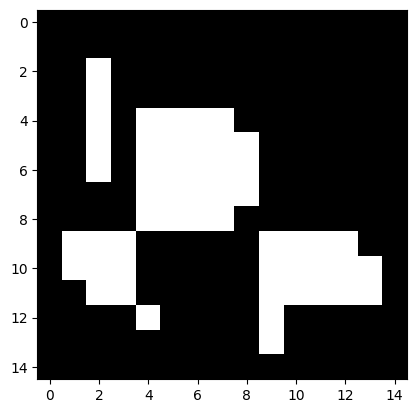

In [4]:
plt.imshow(image, cmap="gray")

In [5]:
i_k = 5
j_k = 5

In [6]:
print(f'i[{i_k}, {j_k}]: {image[i_k, j_k]}')

i[5, 5]: 1


In [7]:
c = 4

In [16]:
image_unique_values = np.unique(image)
print(image_unique_values)

[0 1]


In [18]:
image_unique_values[1]

1

In [8]:
class Pixel:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __lt__(self, other):
        if self.x == other.x:
            return self.y < other.y
        return self.x < other.x
    
    def __hash__(self):
        return hash((self.x, self.y))
    
    def __eq__(self, other):
        if not isinstance(other, type(self)):
            return NotImplemented
        return self.x == other.x and self.y == other.y

In [9]:
print(image.shape)

(15, 15)


In [10]:
def flood_fill_stack(image, seed, c):
    m, n = image.shape
    
    target_color = image[seed.x, seed.y]
    
    if target_color == 0:
        fill_color = 1
    elif target_color == 1:
        fill_color = 0
        
    connected = set()
    
    stack = []
    stack.append(seed)
    
    while len(stack) != 0:
        curr = stack.pop()
        if image[curr.x, curr.y] == target_color:
            image[curr.x, curr.y] = fill_color
            
            if curr != seed:
                connected.add(curr)
            
            if curr.x + 1 < m:
                stack.append(Pixel(curr.x + 1, curr.y))
            if curr.x - 1 > 0:
                stack.append(Pixel(curr.x - 1, curr.y))
            if curr.y + 1 < n:
                stack.append(Pixel(curr.x, curr.y + 1))
            if curr.y - 1 > 0:
                stack.append(Pixel(curr.x, curr.y - 1))
            
            if (c == 8):
                if curr.x + 1 < m:
                    if curr.y + 1 < n:
                        stack.append(Pixel(curr.x + 1, curr.y + 1))
                    if curr.y - 1 > 0:
                        stack.append(Pixel(curr.x + 1, curr.y - 1))
                if curr.x - 1 > 0:
                    if curr.y + 1 < n:
                        stack.append(Pixel(curr.x - 1, curr.y + 1))
                    if curr.y - 1 > 0:
                        stack.append(Pixel(curr.x - 1, curr.y - 1)) 
                
    return connected

In [11]:
seed = Pixel(i_k, j_k)
connected_coords = flood_fill_stack(image, seed, c)

In [12]:
for coords in sorted(connected_coords):
    print(f'({coords.x} {coords.y})', end=" ")

(4 4) (4 5) (4 6) (4 7) (5 4) (5 6) (5 7) (5 8) (6 4) (6 5) (6 6) (6 7) (6 8) (7 4) (7 5) (7 6) (7 7) (7 8) (8 4) (8 5) (8 6) (8 7) 

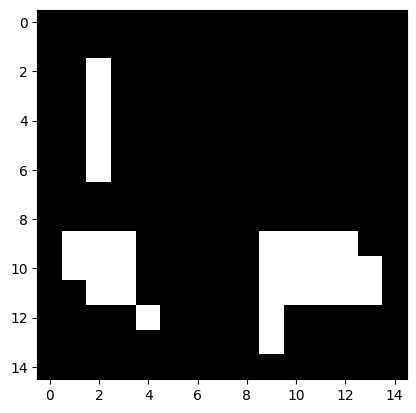

In [13]:
plt.imshow(image, cmap="gray")